# Analyzing New York City's Flood Dataset Metadata on NYC Open Data
Author: Mark Bauer

# Importing Libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
from sodapy import Socrata
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from datetime import datetime, timezone

sns.set_theme()
plt.rcParams['savefig.facecolor'] = 'white'
%matplotlib inline

Documention for installing watermark: https://github.com/rasbt/watermark.

In [2]:
%reload_ext watermark
%watermark -t -d -v -p pandas,sodapy

Python implementation: CPython
Python version       : 3.8.13
IPython version      : 8.4.0

pandas: 1.4.2
sodapy: 2.2.0



### Note:  
`WARNING:root:Requests made without an app_token will be subject to strict throttling limits.`

Read more from the SODA documentation here: https://dev.socrata.com/docs/app-tokens.html

# Quering Dataset Metadata on NYC Open Data

In [3]:
# source domain for NYC Open Data on Socrata
socrata_domain = 'data.cityofnewyork.us'

In [4]:
# Socrata method to query metadata
client = Socrata(
    socrata_domain,
    app_token=None,
    timeout=1000
)

# reading in a list of dictionaries of our data into a pandas DataFrame
df = pd.DataFrame.from_records(client.datasets())

print('shape of data: {}'.format(df.shape))
df.head()

shape of data: (3410, 8)


,resource,classification,metadata,permalink,link,owner,creator,preview_image_url
0,"{'name': 'Civil Service List (Active)', 'id': ...","{'categories': [], 'tags': [], 'domain_categor...",{'domain': 'data.cityofnewyork.us'},https://data.cityofnewyork.us/d/vx8i-nprf,https://data.cityofnewyork.us/City-Government/...,"{'id': '5fuc-pqz2', 'user_type': 'interactive'...","{'id': '5fuc-pqz2', 'user_type': 'interactive'...",NaN
1,"{'name': 'For Hire Vehicles (FHV) - Active', '...","{'categories': [], 'tags': [], 'domain_categor...",{'domain': 'data.cityofnewyork.us'},https://data.cityofnewyork.us/d/8wbx-tsch,https://data.cityofnewyork.us/Transportation/F...,"{'id': '5fuc-pqz2', 'user_type': 'interactive'...","{'id': '5fuc-pqz2', 'user_type': 'interactive'...",NaN
2,"{'name': 'DOB Job Application Filings', 'id': ...","{'categories': ['economy', 'environment', 'hou...",{'domain': 'data.cityofnewyork.us'},https://data.cityofnewyork.us/d/ic3t-wcy2,https://data.cityofnewyork.us/Housing-Developm...,"{'id': '5fuc-pqz2', 'user_type': 'interactive'...","{'id': '5fuc-pqz2', 'user_type': 'interactive'...",NaN
3,"{'name': 'TLC New Driver Application Status', ...","{'categories': ['transportation', 'environment...",{'domain': 'data.cityofnewyork.us'},https://data.cityofnewyork.us/d/dpec-ucu7,https://data.cityofnewyork.us/Transportation/T...,"{'id': '5fuc-pqz2', 'user_type': 'interactive'...","{'id': '5fuc-pqz2', 'user_type': 'interactive'...",NaN
4,{'name': 'For Hire Vehicles (FHV) - Active Dri...,"{'categories': [], 'tags': [], 'domain_categor...",{'domain': 'data.cityofnewyork.us'},https://data.cityofnewyork.us/d/xjfq-wh2d,https://data.cityofnewyork.us/Transportation/F...,"{'id': '5fuc-pqz2', 'user_type': 'interactive'...","{'id': '5fuc-pqz2', 'user_type': 'interactive'...",NaN


In [5]:
# reading the dictionary in the resource column into a pandas DataFrame
df = pd.DataFrame.from_records(df['resource'])

print('shape of data: {}'.format(df.shape))
df.head()

shape of data: (3410, 25)


,name,id,parent_fxf,description,attribution,attribution_link,contact_email,type,updatedAt,createdAt,...,columns_datatype,columns_description,columns_format,download_count,provenance,lens_view_type,lens_display_type,blob_mime_type,hide_from_data_json,publication_date
0,Civil Service List (Active),vx8i-nprf,[],A Civil Service List consists of all candidate...,Department of Citywide Administrative Services...,None,None,dataset,2024-01-03T14:42:55.000Z,2016-06-14T21:12:15.000Z,...,"[Text, Text, Text, Text, Text, Text, Text, Cal...",[A candidate’s middle initial (MI) as it appea...,"[{'displayStyle': 'plain', 'align': 'left'}, {...",59146,official,tabular,table,None,False,2024-01-03T14:42:55.000Z
1,For Hire Vehicles (FHV) - Active,8wbx-tsch,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2024-01-03T19:55:40.000Z,2015-07-16T17:33:32.000Z,...,"[Text, Calendar date, Text, Text, Text, Text, ...","[Vehicle VIN Number, Last Date Updated, Permit...","[{'displayStyle': 'plain', 'align': 'left'}, {...",428112,official,tabular,table,None,False,2021-04-05T13:20:47.000Z
2,DOB Job Application Filings,ic3t-wcy2,[],This dataset contains all job applications sub...,Department of Buildings (DOB),None,None,dataset,2024-01-02T21:10:41.000Z,2013-04-18T15:18:56.000Z,...,"[Text, Text, Text, Text, Text, Text, Number, N...","[Building Class, Equipment Work Type? (X=Yes,...","[{'align': 'right'}, {'align': 'right'}, {'ali...",53419,official,tabular,table,None,False,2020-06-22T18:23:35.000Z
3,TLC New Driver Application Status,dpec-ucu7,[],THIS DATASET IS UPDATED SEVERAL TIMES PER DAY....,Taxi and Limousine Commission (TLC),None,None,dataset,2024-01-03T17:11:19.000Z,2016-05-17T18:43:43.000Z,...,"[Text, Text, Text, Text, Text, Calendar date, ...",[This is the classification of license you hav...,"[{'displayStyle': 'plain', 'align': 'left'}, {...",38602,official,tabular,table,None,False,2019-12-17T18:44:57.000Z
4,For Hire Vehicles (FHV) - Active Drivers,xjfq-wh2d,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2024-01-03T20:03:54.000Z,2015-07-16T17:24:02.000Z,...,"[Text, Text, Number, Text, Text, Calendar date...","[Last Time Updated, WAV if Wheelchair Accessib...","[{'displayStyle': 'plain', 'align': 'left'}, {...",374143,official,tabular,table,None,False,2024-01-03T20:03:54.000Z


In [6]:
# summary of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3410 entries, 0 to 3409
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 3410 non-null   object
 1   id                   3410 non-null   object
 2   parent_fxf           3410 non-null   object
 3   description          3410 non-null   object
 4   attribution          3210 non-null   object
 5   attribution_link     454 non-null    object
 6   contact_email        0 non-null      object
 7   type                 3410 non-null   object
 8   updatedAt            3410 non-null   object
 9   createdAt            3410 non-null   object
 10  metadata_updated_at  3410 non-null   object
 11  data_updated_at      3223 non-null   object
 12  page_views           3410 non-null   object
 13  columns_name         3410 non-null   object
 14  columns_field_name   3410 non-null   object
 15  columns_datatype     3410 non-null   object
 16  column

In [7]:
# preview first 15 columns
df.iloc[:5, :15]

,name,id,parent_fxf,description,attribution,attribution_link,contact_email,type,updatedAt,createdAt,metadata_updated_at,data_updated_at,page_views,columns_name,columns_field_name
0,Civil Service List (Active),vx8i-nprf,[],A Civil Service List consists of all candidate...,Department of Citywide Administrative Services...,None,None,dataset,2024-01-03T14:42:55.000Z,2016-06-14T21:12:15.000Z,2024-01-03T14:42:55.000Z,2024-01-03T14:24:32.000Z,"{'page_views_last_week': 10109, 'page_views_la...","[MI, Exam No, Parent Lgy Credit, First Name, L...","[mi, exam_no, parent_lgy_credit, first_name, l..."
1,For Hire Vehicles (FHV) - Active,8wbx-tsch,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2024-01-03T19:55:40.000Z,2015-07-16T17:33:32.000Z,2022-09-06T21:05:32.000Z,2024-01-03T19:55:40.000Z,"{'page_views_last_week': 7197, 'page_views_las...","[Vehicle VIN Number, Last Date Updated, Active...","[vehicle_vin_number, last_date_updated, active..."
2,DOB Job Application Filings,ic3t-wcy2,[],This dataset contains all job applications sub...,Department of Buildings (DOB),None,None,dataset,2024-01-02T21:10:41.000Z,2013-04-18T15:18:56.000Z,2020-06-23T02:08:44.000Z,2024-01-02T21:10:41.000Z,"{'page_views_last_week': 406, 'page_views_last...","[BUILDING_CLASS, Equipment, GIS_COUNCIL_DISTRI...","[building_class, equipment, gis_council_distri..."
3,TLC New Driver Application Status,dpec-ucu7,[],THIS DATASET IS UPDATED SEVERAL TIMES PER DAY....,Taxi and Limousine Commission (TLC),None,None,dataset,2024-01-03T17:11:19.000Z,2016-05-17T18:43:43.000Z,2022-05-09T22:28:03.000Z,2024-01-03T17:11:19.000Z,"{'page_views_last_week': 158, 'page_views_last...","[Type, Drug Test, Medical Clearance Form, Othe...","[type, drug_test, medical_clearance_form, othe..."
4,For Hire Vehicles (FHV) - Active Drivers,xjfq-wh2d,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2024-01-03T20:03:54.000Z,2015-07-16T17:24:02.000Z,2024-01-03T20:03:54.000Z,2024-01-03T19:59:28.000Z,"{'page_views_last_week': 2749, 'page_views_las...","[Last Time Updated, Wheelchair Accessible Trai...","[last_time_updated, wheelchair_accessible_trai..."


In [8]:
# preview columns starting at col index 15
df.iloc[:5, 15:]

,columns_datatype,columns_description,columns_format,download_count,provenance,lens_view_type,lens_display_type,blob_mime_type,hide_from_data_json,publication_date
0,"[Text, Text, Text, Text, Text, Text, Text, Cal...",[A candidate’s middle initial (MI) as it appea...,"[{'displayStyle': 'plain', 'align': 'left'}, {...",59146,official,tabular,table,None,False,2024-01-03T14:42:55.000Z
1,"[Text, Calendar date, Text, Text, Text, Text, ...","[Vehicle VIN Number, Last Date Updated, Permit...","[{'displayStyle': 'plain', 'align': 'left'}, {...",428112,official,tabular,table,None,False,2021-04-05T13:20:47.000Z
2,"[Text, Text, Text, Text, Text, Text, Number, N...","[Building Class, Equipment Work Type? (X=Yes,...","[{'align': 'right'}, {'align': 'right'}, {'ali...",53419,official,tabular,table,None,False,2020-06-22T18:23:35.000Z
3,"[Text, Text, Text, Text, Text, Calendar date, ...",[This is the classification of license you hav...,"[{'displayStyle': 'plain', 'align': 'left'}, {...",38602,official,tabular,table,None,False,2019-12-17T18:44:57.000Z
4,"[Text, Text, Number, Text, Text, Calendar date...","[Last Time Updated, WAV if Wheelchair Accessib...","[{'displayStyle': 'plain', 'align': 'left'}, {...",374143,official,tabular,table,None,False,2024-01-03T20:03:54.000Z


In [9]:
# explode page_view columns and expand as new columns
df = pd.concat(
    [df.drop(['page_views'], axis=1), df['page_views'].apply(pd.Series)],
    axis=1
)

# preview data
df.head()

,name,id,parent_fxf,description,attribution,attribution_link,contact_email,type,updatedAt,createdAt,...,lens_display_type,blob_mime_type,hide_from_data_json,publication_date,page_views_last_week,page_views_last_month,page_views_total,page_views_last_week_log,page_views_last_month_log,page_views_total_log
0,Civil Service List (Active),vx8i-nprf,[],A Civil Service List consists of all candidate...,Department of Citywide Administrative Services...,None,None,dataset,2024-01-03T14:42:55.000Z,2016-06-14T21:12:15.000Z,...,table,None,False,2024-01-03T14:42:55.000Z,10109.0,23489.0,2524130.0,13.303495,14.519759,21.267355
1,For Hire Vehicles (FHV) - Active,8wbx-tsch,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2024-01-03T19:55:40.000Z,2015-07-16T17:33:32.000Z,...,table,None,False,2021-04-05T13:20:47.000Z,7197.0,35932.0,2505874.0,12.813380,15.133022,21.256883
2,DOB Job Application Filings,ic3t-wcy2,[],This dataset contains all job applications sub...,Department of Buildings (DOB),None,None,dataset,2024-01-02T21:10:41.000Z,2013-04-18T15:18:56.000Z,...,table,None,False,2020-06-22T18:23:35.000Z,406.0,1833.0,2339071.0,8.668885,10.840778,21.157505
3,TLC New Driver Application Status,dpec-ucu7,[],THIS DATASET IS UPDATED SEVERAL TIMES PER DAY....,Taxi and Limousine Commission (TLC),None,None,dataset,2024-01-03T17:11:19.000Z,2016-05-17T18:43:43.000Z,...,table,None,False,2019-12-17T18:44:57.000Z,158.0,963.0,1724090.0,7.312883,9.912889,20.717404
4,For Hire Vehicles (FHV) - Active Drivers,xjfq-wh2d,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2024-01-03T20:03:54.000Z,2015-07-16T17:24:02.000Z,...,table,None,False,2024-01-03T20:03:54.000Z,2749.0,12556.0,1350564.0,11.425216,13.616204,20.365132


In [10]:
# summarize df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3410 entries, 0 to 3409
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       3410 non-null   object 
 1   id                         3410 non-null   object 
 2   parent_fxf                 3410 non-null   object 
 3   description                3410 non-null   object 
 4   attribution                3210 non-null   object 
 5   attribution_link           454 non-null    object 
 6   contact_email              0 non-null      object 
 7   type                       3410 non-null   object 
 8   updatedAt                  3410 non-null   object 
 9   createdAt                  3410 non-null   object 
 10  metadata_updated_at        3410 non-null   object 
 11  data_updated_at            3223 non-null   object 
 12  columns_name               3410 non-null   object 
 13  columns_field_name         3410 non-null   objec

In [11]:
# convert to datetime
today = datetime.now(timezone.utc)
df['createdAt'] = pd.to_datetime(df['createdAt'])

# calculate days elapsed and format date column
df['days_elapsed'] = (today - df['createdAt']).dt.days
df['created_date'] = pd.to_datetime(df['createdAt'].dt.strftime('%Y-%m-%d'))

# normalize counts
df['download_per_day'] = round(df['download_count'] / df['days_elapsed'], 2)
df['page_views_per_day'] = round(df['page_views_total'] / df['days_elapsed'], 2)

# preview data
df.head()

,name,id,parent_fxf,description,attribution,attribution_link,contact_email,type,updatedAt,createdAt,...,page_views_last_week,page_views_last_month,page_views_total,page_views_last_week_log,page_views_last_month_log,page_views_total_log,days_elapsed,created_date,download_per_day,page_views_per_day
0,Civil Service List (Active),vx8i-nprf,[],A Civil Service List consists of all candidate...,Department of Citywide Administrative Services...,None,None,dataset,2024-01-03T14:42:55.000Z,2016-06-14 21:12:15+00:00,...,10109.0,23489.0,2524130.0,13.303495,14.519759,21.267355,2759,2016-06-14,21.44,914.87
1,For Hire Vehicles (FHV) - Active,8wbx-tsch,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2024-01-03T19:55:40.000Z,2015-07-16 17:33:32+00:00,...,7197.0,35932.0,2505874.0,12.813380,15.133022,21.256883,3093,2015-07-16,138.41,810.18
2,DOB Job Application Filings,ic3t-wcy2,[],This dataset contains all job applications sub...,Department of Buildings (DOB),None,None,dataset,2024-01-02T21:10:41.000Z,2013-04-18 15:18:56+00:00,...,406.0,1833.0,2339071.0,8.668885,10.840778,21.157505,3912,2013-04-18,13.66,597.92
3,TLC New Driver Application Status,dpec-ucu7,[],THIS DATASET IS UPDATED SEVERAL TIMES PER DAY....,Taxi and Limousine Commission (TLC),None,None,dataset,2024-01-03T17:11:19.000Z,2016-05-17 18:43:43+00:00,...,158.0,963.0,1724090.0,7.312883,9.912889,20.717404,2787,2016-05-17,13.85,618.62
4,For Hire Vehicles (FHV) - Active Drivers,xjfq-wh2d,[],"<b>PLEASE NOTE:</b> This dataset, which includ...",Taxi and Limousine Commission (TLC),None,None,dataset,2024-01-03T20:03:54.000Z,2015-07-16 17:24:02+00:00,...,2749.0,12556.0,1350564.0,11.425216,13.616204,20.365132,3093,2015-07-16,120.96,436.65


In [12]:
ids = [
    'uihr-hn7s',
    'uyj8-7rv5',
    '7r5q-vr7p',
    '5rzh-cyqd',
    'w8eg-8ha6',
    '6an6-9htp',
    'ezfn-5dsb',
    'ajyu-7sgg',
    'hbw8-2bah',
    'qwca-zqw3',
    '3vjp-ybhy',
    'cyvg-fsk8',
    'q7rf-ks4h',
    'ebsy-4b6x',
    'p8e8-yh4m',
    'amfa-s2y8',
    'mzds-2cdc',
    'bsin-59hv',
    'spjh-pz7h',
    'dpc8-z3jc',
    'uex9-rfq8',
    'hgx4-8ukb',
]

# select dataset ids in df
df = (
    df
    .loc[df['id'].isin(ids)]
    .reset_index(drop=True)
)

print('shape of data: {}'.format(df.shape))
df.head()

shape of data: (22, 34)


,name,id,parent_fxf,description,attribution,attribution_link,contact_email,type,updatedAt,createdAt,...,page_views_last_week,page_views_last_month,page_views_total,page_views_last_week_log,page_views_last_month_log,page_views_total_log,days_elapsed,created_date,download_per_day,page_views_per_day
0,Sandy Inundation Zone,uyj8-7rv5,[],Areas of New York City that were flooded as a ...,Department of Small Business Services (SBS),None,None,map,2023-12-13T02:12:05.000Z,2015-11-09 23:21:21+00:00,...,61.0,525.0,53533.0,5.954196,9.038919,15.708168,2976,2015-11-09,6.82,17.99
1,Sea Level Rise Maps (2050s 500-year Floodplain),qwca-zqw3,[],This is the 500-Year Floodplain for the 2050s ...,Mayor's Office of Climate and Sustainability,None,None,map,2021-09-16T16:38:40.000Z,2013-07-23 21:56:45+00:00,...,172.0,815.0,42580.0,7.434628,9.672425,15.377922,3816,2013-07-23,0.63,11.16
2,1 foot Digital Elevation Model (DEM),dpc8-z3jc,[],NYC 1foot Digital Elevation Model:\r\nA bare-e...,Office of Technology and Innovation (OTI),None,None,href,2022-09-23T19:23:09.000Z,2013-08-09 23:09:58+00:00,...,65.0,336.0,32189.0,6.044394,8.396605,14.974325,3798,2013-08-09,1.72,8.48
3,Sea Level Rise Maps (2020s 100-year Floodplain),ezfn-5dsb,[],This is the 100-Year Floodplain for the 2020s ...,Mayor's Office of Climate and Sustainability,None,None,map,2021-09-16T16:43:22.000Z,2013-07-23 21:05:21+00:00,...,96.0,411.0,26003.0,6.599913,8.686501,14.666446,3816,2013-07-23,55.47,6.81
4,DEP Green Infrastructure,spjh-pz7h,[],NYC Green Infrastructure Program initiatives. ...,Department of Environmental Protection (DEP),None,None,map,2023-12-13T02:19:50.000Z,2017-08-31 20:33:51+00:00,...,64.0,367.0,14816.0,6.022368,8.523562,13.854966,2316,2017-08-31,12.00,6.40


# Top Statistics
## Downloads

In [13]:
(df
 .sort_values(by='download_count', ascending=False)
 .loc[:, ['name', 'id', 'created_date', 'download_count', 'download_per_day']]
 .astype({'download_count':int, 'download_per_day':float})
 .head(10)
 .reset_index(drop=True)
 .set_index([pd.Series(range(1, 11))])
)

,name,id,created_date,download_count,download_per_day
1,Sea Level Rise Maps (2020s 100-year Floodplain),ezfn-5dsb,2013-07-23,211663,55.47
2,Hurricane Evacuation Zones,uihr-hn7s,2015-07-14,41530,13.42
3,DEP Green Infrastructure,spjh-pz7h,2017-08-31,27796,12.00
4,Sandy Inundation Zone,uyj8-7rv5,2015-11-09,20289,6.82
5,1 foot Digital Elevation Model (DEM),dpc8-z3jc,2013-08-09,6524,1.72
6,NYC Stormwater Flood Map - Extreme Flood with ...,w8eg-8ha6,2021-06-07,2991,3.18
7,Sea Level Rise Maps (2050s 100-year Floodplain),hbw8-2bah,2013-07-23,2541,0.67
8,Sea Level Rise Maps (2050s 500-year Floodplain),qwca-zqw3,2013-07-23,2414,0.63
9,NYC Stormwater Flood Map - Moderate Flood with...,7r5q-vr7p,2022-08-17,2089,4.14
10,Projected Sea Level Rise,6an6-9htp,2017-07-12,1897,0.80


Table xx: Top 10 flood datasets sorted by total downloads on NYC Open Data.

In [14]:
(df
 .sort_values(by='download_per_day', ascending=False)
 .loc[:, ['name', 'id', 'created_date', 'download_count', 'download_per_day']]
 .astype({'download_count':int, 'download_per_day':float})
 .head(10)
 .reset_index(drop=True)
 .set_index([pd.Series(range(1, 11))])
)

,name,id,created_date,download_count,download_per_day
1,Sea Level Rise Maps (2020s 100-year Floodplain),ezfn-5dsb,2013-07-23,211663,55.47
2,Hurricane Evacuation Zones,uihr-hn7s,2015-07-14,41530,13.42
3,DEP Green Infrastructure,spjh-pz7h,2017-08-31,27796,12.00
4,Sandy Inundation Zone,uyj8-7rv5,2015-11-09,20289,6.82
5,NYC Stormwater Flood Map - Moderate Flood with...,7r5q-vr7p,2022-08-17,2089,4.14
6,NYC Stormwater Flood Map - Extreme Flood with ...,w8eg-8ha6,2021-06-07,2991,3.18
7,Building Elevation and Subgrade (BES),bsin-59hv,2023-09-12,254,2.25
8,NYC Stormwater Flood Map - Moderate Flood with...,5rzh-cyqd,2021-06-07,1838,1.96
9,1 foot Digital Elevation Model (DEM),dpc8-z3jc,2013-08-09,6524,1.72
10,DEP's Citywide Parcel-Based Impervious Area GI...,uex9-rfq8,2020-07-13,1495,1.18


Table xx: Top 10 flood datasets sorted by total downloads per day on NYC Open Data.

## Page Views

In [15]:
(df
 .sort_values(by='page_views_total', ascending=False)
 .loc[:, [
     'name', 'id', 'created_date',
     'page_views_per_day',
     'page_views_last_week', 'page_views_last_month', 'page_views_total']]
 .astype({
     'page_views_total':int, 'page_views_per_day':float,
     'page_views_last_week':int, 'page_views_last_month':int})
 .head(10)
 .reset_index(drop=True)
 .set_index([pd.Series(range(1, 11))])
)

,name,id,created_date,page_views_per_day,page_views_last_week,page_views_last_month,page_views_total
1,Sandy Inundation Zone,uyj8-7rv5,2015-11-09,17.99,61,525,53533
2,Sea Level Rise Maps (2050s 500-year Floodplain),qwca-zqw3,2013-07-23,11.16,172,815,42580
3,1 foot Digital Elevation Model (DEM),dpc8-z3jc,2013-08-09,8.48,65,336,32189
4,Sea Level Rise Maps (2020s 100-year Floodplain),ezfn-5dsb,2013-07-23,6.81,96,411,26003
5,DEP Green Infrastructure,spjh-pz7h,2017-08-31,6.40,64,367,14816
6,Hurricane Evacuation Zones,uihr-hn7s,2015-07-14,3.32,28,107,10275
7,Sea Level Rise Maps (2050s 100-year Floodplain),hbw8-2bah,2013-07-23,2.67,47,167,10173
8,NYC Stormwater Flood Map - Extreme Flood with ...,w8eg-8ha6,2021-06-07,7.56,30,168,7105
9,DEP's Citywide Parcel-Based Impervious Area GI...,uex9-rfq8,2020-07-13,5.34,17,146,6774
10,NYC Stormwater Flood Map - Moderate Flood with...,7r5q-vr7p,2022-08-17,8.66,22,244,4365


Table xx: Top 10 flood datasets sorted by total page views on NYC Open Data.

In [16]:
(df
 .sort_values(by='page_views_per_day', ascending=False)
 .loc[:, [
     'name', 'id', 'created_date',
     'page_views_per_day',
     'page_views_last_week', 'page_views_last_month', 'page_views_total']]
 .astype({
     'page_views_total':int, 'page_views_per_day':float,
     'page_views_last_week':int, 'page_views_last_month':int})
 .head(10)
 .reset_index(drop=True)
 .set_index([pd.Series(range(1, 11))])
)

,name,id,created_date,page_views_per_day,page_views_last_week,page_views_last_month,page_views_total
1,Sandy Inundation Zone,uyj8-7rv5,2015-11-09,17.99,61,525,53533
2,Sea Level Rise Maps (2050s 500-year Floodplain),qwca-zqw3,2013-07-23,11.16,172,815,42580
3,Building Elevation and Subgrade (BES),bsin-59hv,2023-09-12,9.38,9,84,1060
4,NYC Stormwater Flood Map - Moderate Flood with...,7r5q-vr7p,2022-08-17,8.66,22,244,4365
5,1 foot Digital Elevation Model (DEM),dpc8-z3jc,2013-08-09,8.48,65,336,32189
6,NYC Stormwater Flood Map - Extreme Flood with ...,w8eg-8ha6,2021-06-07,7.56,30,168,7105
7,Sea Level Rise Maps (2020s 100-year Floodplain),ezfn-5dsb,2013-07-23,6.81,96,411,26003
8,DEP Green Infrastructure,spjh-pz7h,2017-08-31,6.40,64,367,14816
9,DEP's Citywide Parcel-Based Impervious Area GI...,uex9-rfq8,2020-07-13,5.34,17,146,6774
10,NYC Stormwater Flood Map - Moderate Flood with...,5rzh-cyqd,2021-06-07,4.25,31,137,3999


Table xx: Top 10 flood datasets sorted by total page views per day on NYC Open Data.

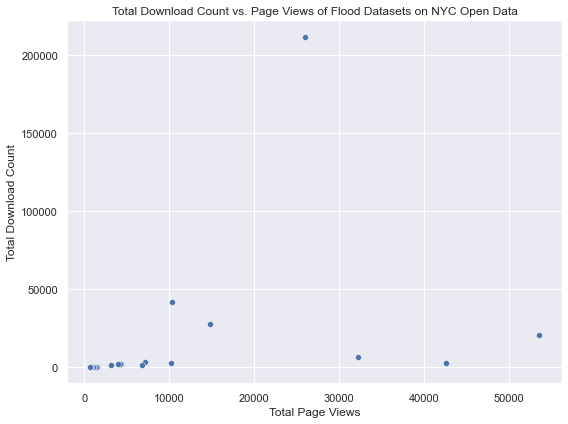

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.scatterplot(
    x=df['page_views_total'],
    y=df['download_count'],
    ax=ax
)

plt.title('Total Download Count vs. Page Views of Flood Datasets on NYC Open Data')
plt.xlabel('Total Page Views')
plt.ylabel('Total Download Count')

plt.tight_layout()

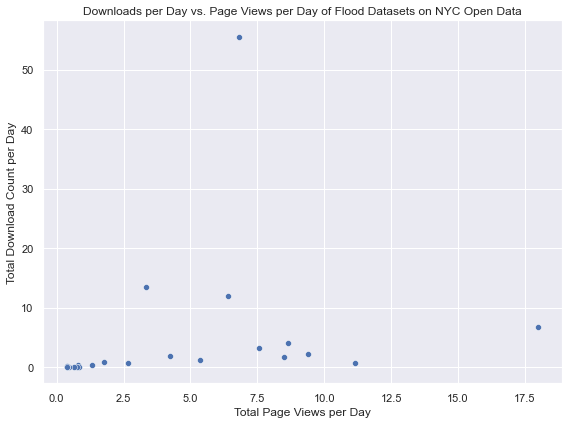

In [18]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.scatterplot(
    x=df['page_views_per_day'],
    y=df['download_per_day'],
    ax=ax
)

plt.title('Downloads per Day vs. Page Views per Day of Flood Datasets on NYC Open Data')
plt.xlabel('Total Page Views per Day')
plt.ylabel('Total Download Count per Day')

plt.tight_layout()

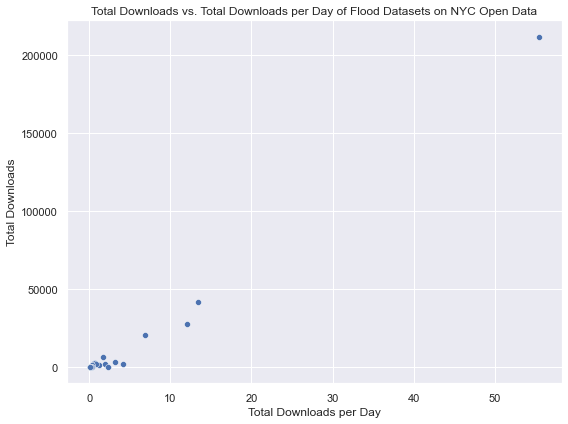

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.scatterplot(
    x=df['download_per_day'],
    y=df['download_count'],
    ax=ax
)

plt.title('Total Downloads vs. Total Downloads per Day of Flood Datasets on NYC Open Data')
plt.xlabel('Total Downloads per Day')
plt.ylabel('Total Downloads')

plt.tight_layout()

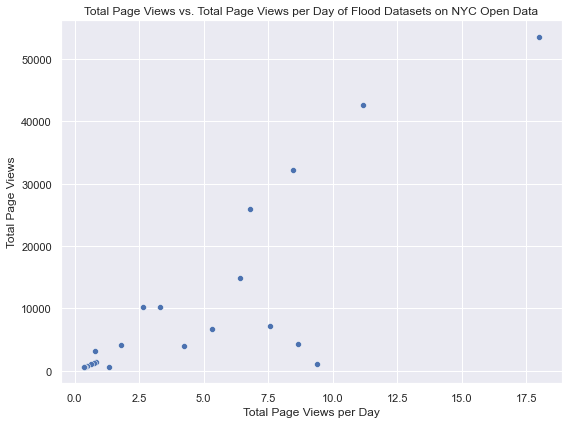

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.scatterplot(
    x=df['page_views_per_day'],
    y=df['page_views_total'],
    ax=ax
)

plt.title('Total Page Views vs. Total Page Views per Day of Flood Datasets on NYC Open Data')
plt.xlabel('Total Page Views per Day')
plt.ylabel('Total Page Views')

plt.tight_layout()